In [45]:
from pathlib import Path
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
methods = ['velocyto',
           'scvelo_dy',
           'scvelo_st',
           'veloae',
           'dynamo',
           'unitvelo_ind',
           'unitvelo_uni',
           'velovae',
           'velovae_full',
           'deepvelo_gcn',
           'celldancer',
           'pyro_model1',
           'pyro_model2',
           'kappa',
           'velovi',
           'sdevelo',
           'cell2fate',
           'svelvetvae', 
           'latentvelo', 
           'tivelo',
           'tivelo_simple',
           'sctour_mse',
           'sctour_nb', 
           'sctour_zinb', 
           'graphvelo']

newmethods = {
    'unitvelo_ind': 'UniTVelo (ind)',
    'velovi': 'veloVI',
    'cell2fate': 'cell2fate',
    'latentvelo_std': 'LatentVelo (std)',
    'pyrovelocity_m1': 'Pyro-velocity (m1)',
    'pyrovelocity_m2': 'Pyro-velocity (m2)',
    'sctour_mse': 'scTour (MSE)',
    'sctour_nb': 'scTour (NB)',
    'sctour_zinb': 'scTour (ZINB)',
    'scvelo_dyn': 'scVelo (dyn)',
    'unitvelo_uni': 'UniTVelo (uni)',
    'deepvelo': 'DeepVelo',
    'svelvetvae': 'SvelvetVAE',
    'tivelo_std': 'TIVelo (std)',
    'tivelo_simple': 'TIVelo (simple)',
    'velocyto': 'Velocyto',
    'veloae': 'VeloAE',
    'velovae_std': 'VeloVAE (std)',
    'velovae_fullvb': 'VeloVAE (Full VB)',
    'kvelo': 'κ-velo',
    'celldancer': 'cellDancer',
    'dynamo_m1': 'Dynamo (m1)',
    'graphvelo_std': 'GraphVelo (std)',
    'scvelo_stc': 'scVelo (stc)',
    'sdevelo': 'SDEvelo'
}


datasets_direction = ["data02", "data03", "data05"]
datasets_time = ["data03", "data07", "data08"]

In [47]:
dfs = []

for ds in datasets_direction:
    df = pd.read_csv( Path(ds) / "cbdir_df.csv")
    df["dataset"] = ds
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)


# Melt into long format: method | fold | value (cbdir)
df_long = df_all.melt(
    id_vars=["Method", "dataset"],
    var_name="fold",
    value_name="cbdir"
)

# Convert fold from string to integer (to avoid sorting issues)
df_long["fold"] = df_long["fold"].astype(int)

# -----------------------------------
# Calculate: Mean across 3 datasets for Method × fold
# -----------------------------------
mean_df = (
    df_long.groupby(["Method", "fold"])["cbdir"]
    .mean()
    .reset_index()
)

# -----------------------------------
# Prepare input for boxplot
# -----------------------------------
folds = sorted(mean_df["fold"].unique())

# y-values for each fold = mean of all methods for that fold
data_for_box = [
    mean_df[mean_df["fold"] == f]["cbdir"].values
    for f in folds
]

/tmp/ipykernel_92396/1787835044.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


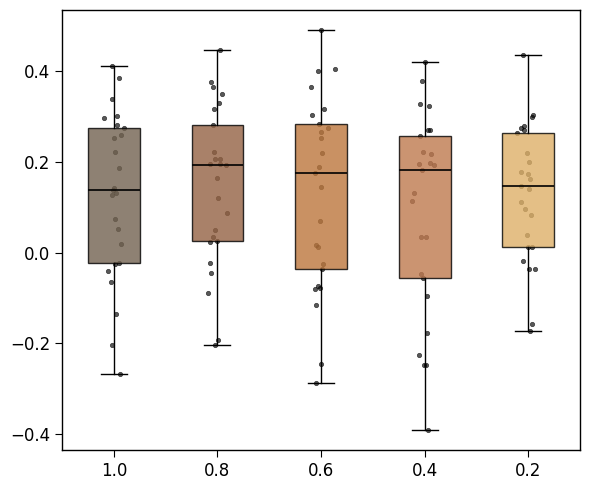

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming data_for_box and folds are already defined from previous steps

# ============================
# 1. Reverse the Data and Colors
# ============================
# Reverse data so it goes from 1.0 -> 0.2 (High to Low)
data_for_box_rev = data_for_box[::-1]

box_colors = ["#deb068", "#bf794e", "#bc763c", "#946243", "#726250"]
# Resize to match folds count
box_colors = box_colors[:len(folds)]
# Reverse colors to match the data reversal (so 1.0 keeps its original color)
box_colors_rev = box_colors[::-1]

plt.figure(figsize=(6, 5))

# ============================
# 2. Plotting
# ============================
box = plt.boxplot(
    data_for_box_rev,            # Use reversed data
    labels=folds,                # Labels are just placeholders here, we set ticks manually below
    patch_artist=True,
    medianprops={"color": "black", "linewidth": 1.2},
    boxprops={"linewidth": 1, "color": "black"},
    whiskerprops={"linewidth": 1, "color": "black"},
    capprops={"linewidth": 1, "color": "black"},
    flierprops={"marker": "o", "markersize": 3, "markerfacecolor": "black", "markeredgecolor": "black"}
)

# Apply colors
for patch, color in zip(box["boxes"], box_colors_rev):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
    patch.set_edgecolor("black")
    patch.set_linewidth(1)

# Add Scatter Points (Jitter)
for i, y in enumerate(data_for_box_rev):
    x = np.random.normal(loc=i + 1, scale=0.05, size=len(y))
    plt.scatter(
        x, y,
        color="black",
        alpha=0.65,
        s=10,
        edgecolors="black",
        linewidth=0.5
    )

# ============================
# 3. Formatting
# ============================
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("", fontsize=13)

plt.tick_params(
    axis='both',
    which='both',
    direction='out',
    length=5,
    color='black',
    top=False, right=False,
    bottom=True, left=True,
    labelsize=12
)


plt.xticks(
    ticks=np.arange(1, len(folds) + 1), 
    labels=[1.0, 0.8, 0.6, 0.4, 0.2],
    fontsize=12
)

for spine in plt.gca().spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

plt.tight_layout()
plt.savefig("depth_cbdir.png", bbox_inches="tight", dpi=300)
plt.show()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


dfs = []

for ds in datasets_time:
    df = pd.read_csv( Path(ds) / "spearman_df.csv")
    df["dataset"] = ds
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)


df_long = df_all.melt(
    id_vars=["Method", "dataset"],
    var_name="fold",
    value_name="spearman"
)


df_long["fold"] = df_long["fold"].astype(int)

mean_df = (
    df_long.groupby(["Method", "fold"])["spearman"]
    .mean()
    .reset_index()
)

folds = sorted(mean_df["fold"].unique())

data_for_box = [
    mean_df[mean_df["fold"] == f]["spearman"].values
    for f in folds
]



/tmp/ipykernel_92396/3794116477.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


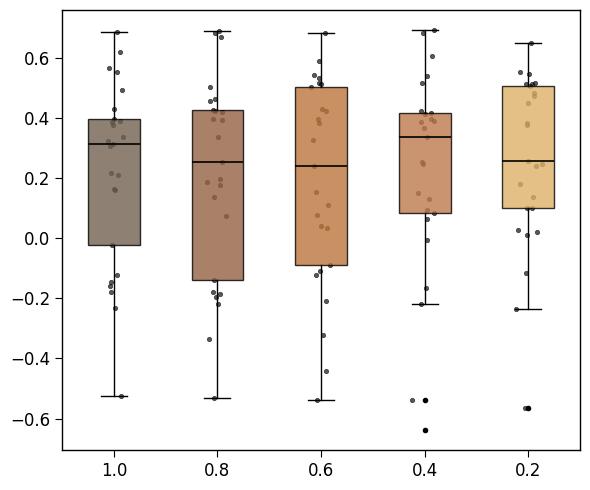

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming data_for_box and folds are already defined from previous steps

# ============================
# 1. Reverse the Data and Colors
# ============================
# Reverse data so it goes from 1.0 -> 0.2 (High to Low)
data_for_box_rev = data_for_box[::-1]

box_colors = ["#deb068", "#bf794e", "#bc763c", "#946243", "#726250"]
# Resize to match folds count
box_colors = box_colors[:len(folds)]
# Reverse colors to match the data reversal (so 1.0 keeps its original color)
box_colors_rev = box_colors[::-1]

plt.figure(figsize=(6, 5))

# ============================
# 2. Plotting
# ============================
box = plt.boxplot(
    data_for_box_rev,            # Use reversed data
    labels=folds,                # Labels are just placeholders here, we set ticks manually below
    patch_artist=True,
    medianprops={"color": "black", "linewidth": 1.2},
    boxprops={"linewidth": 1, "color": "black"},
    whiskerprops={"linewidth": 1, "color": "black"},
    capprops={"linewidth": 1, "color": "black"},
    flierprops={"marker": "o", "markersize": 3, "markerfacecolor": "black", "markeredgecolor": "black"}
)

# Apply colors
for patch, color in zip(box["boxes"], box_colors_rev):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
    patch.set_edgecolor("black")
    patch.set_linewidth(1)

# Add Scatter Points (Jitter)
for i, y in enumerate(data_for_box_rev):
    x = np.random.normal(loc=i + 1, scale=0.05, size=len(y))
    plt.scatter(
        x, y,
        color="black",
        alpha=0.65,
        s=10,
        edgecolors="black",
        linewidth=0.5
    )

# ============================
# 3. Formatting
# ============================
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("", fontsize=13)

plt.tick_params(
    axis='both',
    which='both',
    direction='out',
    length=5,
    color='black',
    top=False, right=False,
    bottom=True, left=True,
    labelsize=12
)


plt.xticks(
    ticks=np.arange(1, len(folds) + 1), 
    labels=[1.0, 0.8, 0.6, 0.4, 0.2],
    fontsize=12
)

for spine in plt.gca().spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

plt.tight_layout()
plt.savefig("depth_spearman.png", bbox_inches="tight", dpi=300)
plt.show()